# Multinomial Naïve Bayes Classifier - the YouTube Dataset

### Introducing the database

The database for this example is taken from https://archive.ics.uci.edu/ml/machine-learning-databases/00380/ 

We usually modify the databases slightly such that they fit the purpose of the course. Therefore, we suggest you use the database provided in the resources in order to obtain the same results as the ones in the lectures.

### Importing the necessary libraries

In [1]:
# A module for handling data
import pandas as pd
# A module that helps finding all pathnames that match a certain pattern
import glob

# A class that will be used to count the number of times a word has occurred in a text
from sklearn.feature_extraction.text import CountVectorizer

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The multinomial type of the Naive Bayes classfier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Importing different metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# The Python package for scientific computing
import numpy as np

### Reading the database

In [2]:
# Using the 'glob()' method, create a variable of type 'list' called 'files'. 
# It stores the paths of all files in the folder 'youtube-dataset' whose extension is .csv.
files = glob.glob('youtube-dataset\\*.csv')
files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [3]:
# An empty array which will be used to store all 5 dataframes corresponding to the 5 .csv files. 
all_df = []

# Run a for-loop where the iterator 'i' goes through each filename in the 'files' array.
# During each iteration, create a pandas DataFrame by reading the current .csv file. 
# Drop the unneccesary columns (along axis 1) and append the dataframe to the 'all_df' list.
for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [4]:
# Look at the first item in the list
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [5]:
# Check the length of the list
len(all_df)

5

In [6]:
# Create a dataframe that combines all pandas dataframes from the 'all_df' list
data = pd.concat(all_df, axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [7]:
# Check for null values. In this case, there aren't any.
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [8]:
# Check the number of representatives from each class. 
# In this case, the data is reasonably balanced.
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

### Sample 1

In [9]:
# Define a list storing a single string
message_sample = ['This is a dog']

# Define an instance of the CountVectorizer class
vectorizer_sample = CountVectorizer()

# Learn a vocabulary dictionary of all tokens in 'message_sample'. A token is a word consisting of at least 2 letters.
vectorizer_sample.fit(message_sample)

CountVectorizer()

In [10]:
# Transform the document into a document-term matrix. 
# Each 1 in the matrix represents the presence of a certain word in the fitted string(s).
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]], dtype=int64)

In [11]:
# Output the words that represent each column in the matrix above.
# For example, the first 1 in the matrix above corresponds to the presence of the word 'dog' in the string.
# The 2nd 1 means that the string also includes the word 'is'.
# The 3rd one means that the word 'this' is also present in the string
# Notice how the article 'a' is not included in the list of tokens, as it consists of only one letter.
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [12]:
# Apply the 'transform()' method to a new string and check which of the tokenized words are present.
# We can see a 0 in the first column.
# This indicate that the word 'dog' is absent from the transformed string.
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]], dtype=int64)

### Sample 2

In [13]:
# Define a list storing two strings
message_sample2 = ['This is a dog and that is a dog', 'This is a cat']

# Define another instance of the CountVectorizer class
vectorizer_sample2 = CountVectorizer()

# Apply the 'fit()' and the 'transform()' methods simultaneously
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]], dtype=int64)

In [14]:
# Output the words that represent each column in the matrix above.
# The elements in the first column are 0 and 1.
# This means that the word 'cat' is not present in the first string but is found in the second string.
# The elements in the second column are 1 and 0.
# Therefore, the word 'dog' is present in the first string, but not in the second.
# We appply the same arguments to the elements of the third and the fourth column in the matrix.
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [15]:
# Apply the 'transform()' method to a new string and check which of the tokenized words are present.
# All columns are 0. Therefore, none of the words above are present in this string.
vectorizer_sample2.transform(['Those are birds.']).toarray()

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

### Defining the inputs and the target. Creating the train-test split.

In [16]:
# Define the inputs and the target
inputs = data['CONTENT']
target = data['CLASS']

In [17]:
# Create a training and a testing dataset.
# Choose the test size such that 20% of the data goes to testing.
# Since 'train_test_split()' distributes the points randomly, we set a seed equal to 365
# so that the final results are identical each time we run the split.
# The 'stratify' argument allows for splitting the data in such a way that
# the training and the testing datasets contain an equal portion of samples
# from both classes.
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

In [18]:
# Check the counts on the ham and the spam messages in the training dataset.
# You can choose to normalize the counts or display their actual value.
# y_train.value_counts(normalize = True)
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [19]:
# Check the counts on the ham and the spam messages in the test dataset.
# You can choose to normalize the counts or display their actual value
# y_test.value_counts(normalize = True)
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

### Tokenizing the YouTube comments

In [20]:
# Create an instance of the vectorizer class.
vectorizer = CountVectorizer()

In [21]:
# Apply the fit_transform() method on the training data and the transform() method on the test data.
# Note that we split the data *before* applying the 'fit_tranform()' method!
# The 'fit_transform()' method is to be applied *only* on the training data!
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [22]:
# Check how the 'x_train_transf' matrix looks like.
# It is a sparse matrix i.e., contains mainly zeros.
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# 1564 refers to all comments in the training dataset.
# 3925 refers to all words that have been tokenized.
x_train_transf.shape

(1564, 3925)

In [24]:
# 391 refers to all comments in the test dataset.
# 3925 refers to all words that have been tokenized during the fitting process.
x_test_transf.shape

(391, 3925)

### Performing the classification

In [25]:
# Create an instance of the Multinomial Naive Bayes classifier
clf = MultinomialNB()
# clf = MultinomialNB(class_prior = np.array([0.6, 0.4]))

# Fit the model to the training data
clf.fit(x_train_transf, y_train)

MultinomialNB()

In [26]:
# Print the class priors.
np.exp(clf.class_log_prior_)

array([0.48657289, 0.51342711])

In [27]:
# Return the parameters of the classifier
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

### Performing the evaluation on the test dataset

In [28]:
# Predict the target of the observations in the test set
y_test_pred = clf.predict(x_test_transf)

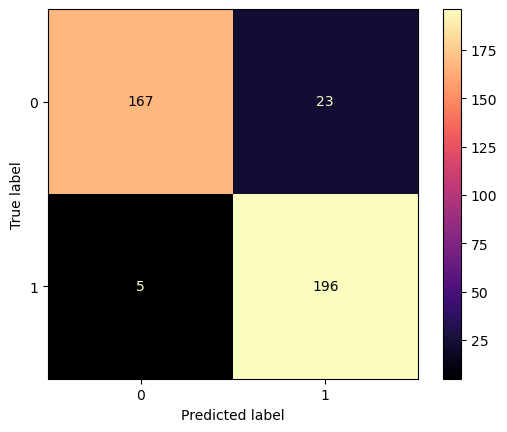

In [29]:
# Drop the seaborn style, so that we remove the white lines passing throguh the numbers 
sns.reset_orig()

# Create the confusion matrix by providing the true and the predicted values as arguments.
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [30]:
# The classification report consists of the precision, recall and f1-score of each class as well as
# the overall accuracy of the model.
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.88      0.92       190
        Spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



### Creating probability-distribution figures

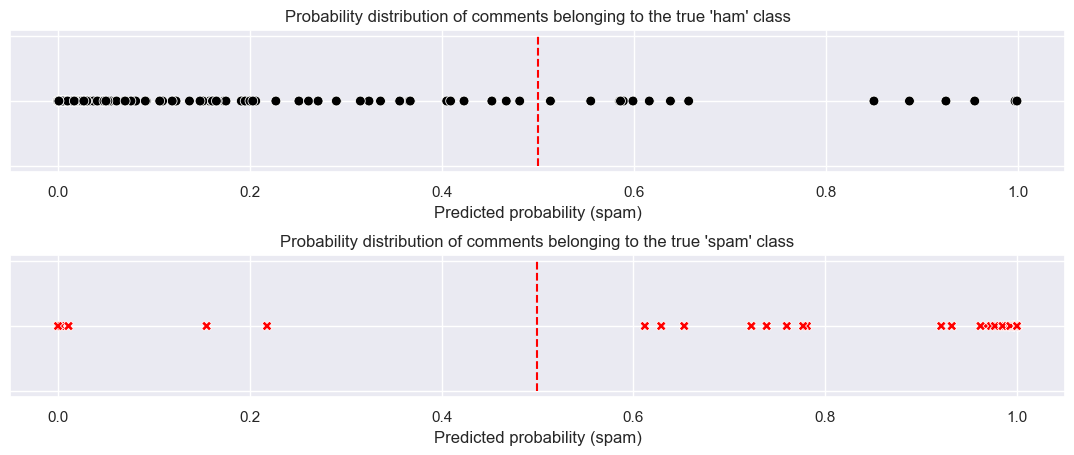

In [31]:
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot. 
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

### Making predictions

In [32]:
# Choose the messages whose class you want to predict and put them in a list.
# Using the vectorizer, transform the messages and store the result in a variable called 'predict_data'.
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [33]:
# Call the 'predict()' method and use 'predict_data' as an argument.
# The classifier correctly predicts the two messages.
clf.predict(predict_data)

array([0, 1], dtype=int64)

In [34]:
# MultinomialNB(fit_prior = False)
# for prior type naive bayes

In [37]:
import pickle
pickle.dump(clf, open('model.p','wb'))

In [38]:
pickle.dump(vectorizer, open('vec.p','wb'))